# Data extraction and cleaning

In [1]:
#Dependencies

import os
import json
import pandas as pd
import csv
import numpy as np
from tqdm import tqdm
import re
import string

## 1st data set

In [2]:
#read the data file

data = {'review_id': [], 'user_id': [], 'business_id': [], 'stars': [], 
        'useful': [], 'funny': [], 'cool': [], 'text': [], 'date': []}

with open('./yelp-dataset/yelp_academic_dataset_review.json', encoding='utf-8') as f:
    for line in tqdm(f):
        review = json.loads(line)
        data['review_id'].append(review['review_id'])
        data['user_id'].append(review['user_id'])
        data['business_id'].append(review['business_id'])
        data['stars'].append(review['stars'])
        data['useful'].append(review['useful'])
        data['funny'].append(review['funny'])
        data['cool'].append(review['cool'])
        data['text'].append(review['text'])
        data['date'].append(review['date'])


6685900it [02:38, 42294.26it/s]


In [3]:
review.keys()

dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])

In [4]:
#Convert the into the dataframe
review_df = pd.DataFrame(data)

print(review_df.shape)
print(review_df.dtypes)
review_df.head()

(6685900, 9)
review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [5]:
review_df['review_id'] = review_df['review_id'].astype(str)
review_df['user_id'] = review_df['user_id'].astype(str)
review_df['business_id'] = review_df['business_id'].astype(str)
review_df['stars'] = review_df['stars'].astype('category')
review_df['useful'] = review_df['useful'].astype('category')
review_df['funny'] = review_df['funny'].astype('category')
review_df['cool'] = review_df['cool'].astype('category')
review_df['text'] = review_df['text'].astype(str)
review_df['date'] = review_df['date'].astype(str)

In [6]:
review_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
#convert the yelp review json file into csv file
#review_df.to_csv('yelp_reviews.csv', index=False)

In [7]:
review_df["text"].head(20)

0     Total bill for this horrible service? Over $8G...
1     I *adore* Travis at the Hard Rock's new Kelly ...
2     I have to say that this office really has it t...
3     Went in for a lunch. Steak sandwich was delici...
4     Today was my second out of three sessions I ha...
5     I'll be the first to admit that I was not exci...
6     Tracy dessert had a big name in Hong Kong and ...
7     This place has gone down hill.  Clearly they h...
8     I was really looking forward to visiting after...
9     It's a giant Best Buy with 66 registers.  I do...
10    Like walking back in time, every Saturday morn...
11    Walked in around 4 on a Friday afternoon, we s...
12    Wow. So surprised at the one and two star revi...
13    Michael from Red Carpet VIP is amazing ! I rea...
14    I cannot believe how things have changed in 3 ...
15    You can't really find anything wrong with this...
16    Great lunch today. Staff was very helpful in a...
17    I love chinese food and I love mexican foo

In [8]:
#make all text lower case

review_df["text"] = review_df["text"].str.lower()

In [9]:
review_df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,total bill for this horrible service? over $8g...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,i *adore* travis at the hard rock's new kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,i have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,went in for a lunch. steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,today was my second out of three sessions i ha...,2018-01-30 23:07:38
5,fdiNeiN_hoCxCMy2wTRW9g,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,0,0,0,i'll be the first to admit that i was not exci...,2013-01-20 13:25:59
6,G7XHMxG0bx9oBJNECG4IFg,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,tracy dessert had a big name in hong kong and ...,2016-05-07 01:21:02
7,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,this place has gone down hill. clearly they h...,2010-10-05 19:12:35
8,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,i was really looking forward to visiting after...,2015-01-18 14:04:18
9,RS_GTIT6836bCaPy637kNQ,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0,1,it's a giant best buy with 66 registers. i do...,2012-02-29 21:52:43


In [10]:
#remove all punctuations in the text

review_df["text"] = review_df['text'].str.replace('[^\w\s]','')

In [11]:
review_df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,total bill for this horrible service over 8gs ...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,i adore travis at the hard rocks new kelly car...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,i have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,went in for a lunch steak sandwich was delicio...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,today was my second out of three sessions i ha...,2018-01-30 23:07:38
5,fdiNeiN_hoCxCMy2wTRW9g,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,0,0,0,ill be the first to admit that i was not excit...,2013-01-20 13:25:59
6,G7XHMxG0bx9oBJNECG4IFg,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,tracy dessert had a big name in hong kong and ...,2016-05-07 01:21:02
7,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,this place has gone down hill clearly they ha...,2010-10-05 19:12:35
8,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,i was really looking forward to visiting after...,2015-01-18 14:04:18
9,RS_GTIT6836bCaPy637kNQ,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0,1,its a giant best buy with 66 registers i dont...,2012-02-29 21:52:43


In [12]:
review_df["text"].head(20)

0     total bill for this horrible service over 8gs ...
1     i adore travis at the hard rocks new kelly car...
2     i have to say that this office really has it t...
3     went in for a lunch steak sandwich was delicio...
4     today was my second out of three sessions i ha...
5     ill be the first to admit that i was not excit...
6     tracy dessert had a big name in hong kong and ...
7     this place has gone down hill  clearly they ha...
8     i was really looking forward to visiting after...
9     its a giant best buy with 66 registers  i dont...
10    like walking back in time every saturday morni...
11    walked in around 4 on a friday afternoon we sa...
12    wow so surprised at the one and two star revie...
13    michael from red carpet vip is amazing  i reac...
14    i cannot believe how things have changed in 3 ...
15    you cant really find anything wrong with this ...
16    great lunch today staff was very helpful in as...
17    i love chinese food and i love mexican foo

In [296]:
review_df.sort_values(by=['date'], inplace=True, ascending=False)
print(review_df.head())
print(review_df.tail())

                      review_id                 user_id  \
3986173  e2AOJ3MSAYUCy4zx0NXxUA  fu-jsnkPbj4zhI2lz0ewkQ   
5226537  XLOm-4l1aMwheuxs-V4wKw  UTNefnQ3eZEbIxVu7ALO7Q   
2564946  I59JegTz5rQ80emJP83ckQ  222_8pOPN2Ogy-gLNjudHw   
3981102  UEg_PspRx9mESti4F2B5IQ  A9Z4tpG4xt06lCxFUU5khw   
3232065  RwbYq93Sz-TjJws-SxRbQQ  a6NY1dBAYXZMBDxtWU6Zjw   

                    business_id stars useful funny cool  \
3986173  wItXs66eEADndAGl-u_lpw   5.0      0     0    0   
5226537  S0DRkPCiMRmMtIPVM54FRw   5.0      0     0    0   
2564946  0d0i0FaJq1GIeW1rS2D-5w   3.0      0     0    0   
3981102  1e7GXqhVDs0UXUofjTkVgQ   5.0      0     0    0   
3232065  ovQDI5j3aRIw_y73IdnqVg   5.0      0     0    0   

                                                      text  \
3986173  on first consultation already jonathan was rev...   
5226537  i am absolutely obsessed my friend told me to ...   
2564946  my expectations were extremely high and unfort...   
3981102  i called to get a faucet replaced

In [69]:
#The original data is too big and I amd getting memory error. I will reduce the size for last two years(2017 and 2018)

reduced_review_df = review_df.loc[review_df['date'] >= '2017-11-01']
reduced_review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3986173,e2AOJ3MSAYUCy4zx0NXxUA,fu-jsnkPbj4zhI2lz0ewkQ,wItXs66eEADndAGl-u_lpw,5.0,0,0,0,on first consultation already jonathan was rev...,2018-11-14 18:13:26
5226537,XLOm-4l1aMwheuxs-V4wKw,UTNefnQ3eZEbIxVu7ALO7Q,S0DRkPCiMRmMtIPVM54FRw,5.0,0,0,0,i am absolutely obsessed my friend told me to ...,2018-11-14 18:13:16
2564946,I59JegTz5rQ80emJP83ckQ,222_8pOPN2Ogy-gLNjudHw,0d0i0FaJq1GIeW1rS2D-5w,3.0,0,0,0,my expectations were extremely high and unfort...,2018-11-14 18:12:40
3981102,UEg_PspRx9mESti4F2B5IQ,A9Z4tpG4xt06lCxFUU5khw,1e7GXqhVDs0UXUofjTkVgQ,5.0,0,0,0,i called to get a faucet replaced chris was ve...,2018-11-14 18:12:18
3232065,RwbYq93Sz-TjJws-SxRbQQ,a6NY1dBAYXZMBDxtWU6Zjw,ovQDI5j3aRIw_y73IdnqVg,5.0,0,0,0,charlie just completed reroofing my home and i...,2018-11-14 18:12:08


In [70]:
print(reduced_review_df.shape)
reduced_review_df.tail()

(1365043, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
5746459,8v6jUPit-3jJYLk4ZHa1Uw,IrBAWjq1aSVX1vIPzdn8RQ,o2zNALB8VLGhsq-fjC5qsQ,4.0,0,0,0,service here is good and quick nice casual pla...,2017-11-01 00:02:37
399385,_tNPqBgNz0QucJ3KKtJmGw,Rbr4wwGbRjPwGcgjlxC4Mw,2dCnTMv3Hh-fM8bOjYS4Xw,1.0,0,0,0,os not as fresh as before the chicken is cold ...,2017-11-01 00:01:53
6417769,QCSEIX58FTcFSRjlttH8iQ,IamJ-OX89_P-i-xkknwpPA,EhLFahtmeFXT3MGx0bwlzw,5.0,4,1,2,this was a huge church without being overtly o...,2017-11-01 00:01:33
5609833,GblwjyjcpK455QonhzSyfg,boLGreuzOXfreFivRIsbPg,K-haZKqNHIJwWlFvbnn7vA,3.0,3,1,1,you know i really come to starbucks too often ...,2017-11-01 00:00:37
2936474,-ieh69VP3cnuLv8bQfQqdQ,lTmKG7JCwjLkVG6lYHUcbw,KY2NffdY2fE71Dhu0TiisQ,1.0,0,0,0,this is a bar you come to if you dont want to ...,2017-11-01 00:00:29


In [34]:
#convert the reduced yelp review dataframe into csv file
#reduced_review_df.to_csv('reduced_yelp_reviews.csv', index=False)

In [36]:
#sample size df to test creating a document-term matrix using CountVentorizer
sample_review_df = reduced_review_df.head(100)

In [38]:
#Create a document-term matrix using CountVentorizer and exclude common English words for the sample size df

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(sample_review_df.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = sample_review_df.index
data_dtm

,10,100,11110,11am,12,12oz,14,15,150,16,...,youll,young,youre,youth,yucca,yum,yummo,yummy,yup,zero
3986173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5226537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2564946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3981102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3232065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2604964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3293720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3965265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Create dtm on the actual data set
# cv = CountVectorizer(stop_words='english')
# data_cv = cv.fit_transform(reduced_review_df.text)
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_dtm.index = reduced_review_df.index
# data_dtm

# The dataset is too large to create a document-term matrix

MemoryError: 

In [44]:
#Combine the sample size text into one 

text = " ".join(sample_review_df["text"].values)
print(text)

on first consultation already jonathan was reviewing all my tax records and giving recommendations i feel much better and we put together a very good plan for my future taxes thanks for great service i am absolutely obsessed my friend told me to check it out and im so happy i did because it is absolutely delicious usually im not a fan of protein shakes however these smoothies taste amazing you cannot taste the protein and its like drinking a dessert only healthier theyre very filling as well so thats a plus the staff is also very friendly ive never had a bad experience my expectations were extremely high and unfortunately they werent met i ordered the kickin chicken waffle sandwich and the product really didnt sit well with me the sauce was fairly over powering and it wasnt spicy enough for me 

i think this was a classic case of ordering the wrong item because when i took apart my sandwich and tried the waffle and fried chicken separately they were actually really good i wish i had or

edit i still love their food but their pricing is ridiculous  i subbed a different cheese in my burrito and they still charged me for it  the girl even told me when they sub a cheese they have to charge extra for it  pretty crappy business practice do not come here if you value your time i am here for the second time and the last time both times i have waited for 50 minutes the subs were great the place is clean the staff is friendly  very professional me  a coworker went here last night i got the club  she got the philly cheese both were delicious this was my first experience in a jeweler looking at rings and jillian made it very memorable i felt so taken care of and important they truly know how to make you feel welcome and special when shopping for something so meaningful the selection here was also amazing open casing to try on and all i will be back coming back to spence for my engagement ring 100 cant speak to the quality of the paint job because they never bothered to show up fo

In [49]:
!pip install vaderSentiment

In [54]:
#run sentiment analysis on the 100 sample text 
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize, RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string 


analyzer = SentimentIntensityAnalyzer()

def get_word_sentiment(text):
    tokenized_text = nltk.word_tokenize(text)
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    for word in tokenized_text:
        if (analyzer.polarity_scores(word)['compound']) >= 0.1:
            pos_word_list.append(word)
        elif (analyzer.polarity_scores(word)['compound']) <= -0.1:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)
    return pos_word_list, neu_word_list, neg_word_list
    

positive_words, neutral_words, negative_words = get_word_sentiment(text)
print("Positive")
print(positive_words)
print("Neutral")
print(neutral_words)
print("Negative")
print(negative_words)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive
['giving', 'better', 'good', 'thanks', 'great', 'friend', 'happy', 'delicious', 'fan', 'amazing', 'like', 'well', 'friendly', 'well', 'good', 'wish', 'best', 'friendly', 'honest', 'recommend', 'honesty', 'assure', 'well', 'benefit', 'progress', 'competitive', 'save', 'compassionate', 'excellence', 'confidence', 'smile', 'help', 'restore', 'smile', 'wish', 'share', 'praise', 'gratitude', 'trust', 'great', 'amazing', 'clearly', 'well', 'good', 'good', 'like', 'sharing', 'ready', 'cheerful', 'nice', 'pretty', 'wonderful', 'please', 'giving', 'sure', 'pleased', 'truly', 'friendly', 'truly', 'thanks', 'recommended', 'romantic', 'best', 'enjoy', 'amazing', 'delicious', 'love', 'good', 'perfect', 'perfect', 'like', 'delicious', 'lol', 'excited', 'definitely', 'good', 'yummy', 'well', 'shared', 'wish', 'share', 'lol', 'amazing', 'lol', 'great', 'great', 'liked', 'good', 'great', 'great', 'please', 'significant', 'prepared', 'best', 'flawless', 'energy', 'rewards', 'great', 'good', 'lu

Negative
['obsessed', 'bad', 'unfortunately', 'wrong', 'alone', 'cancer', 'fails', 'contradict', 'sadly', 'mistaken', 'no', 'no', 'charged', 'charged', 'charged', 'charged', 'wrong', 'scam', 'confusing', 'annoying', 'fault', 'forget', 'disappointed', 'hard', 'waste', 'no', 'no', 'stop', 'stopped', 'stop', 'pay', 'wrong', 'no', 'messed', 'damage', 'messed', 'wrong', 'argue', 'stuck', 'damage', 'terrible', 'charged', 'downside', 'funeral', 'funeral', 'disappointing', 'missing', 'upsetting', 'stopped', 'tough', 'lower', 'bad', 'wrong', 'empty', 'wrong', 'no', 'desperately', 'leaked', 'unfortunately', 'leak', 'bad', 'bloody', 'bloody', 'falling', 'lazy', 'worst', 'stops', 'no', 'terrible', 'no', 'hard', 'shaking', 'worst', 'jerk', 'cancelled', 'no', 'pain', 'no', 'no', 'odd', 'rants', 'ass', 'rant', 'shock', 'blaming', 'ignore', 'negative', 'hell', 'blah', 'blah', 'blah', 'nervous', 'bullshit', 'ill', 'empty', 'stress', 'die', 'flop', 'flop', 'hard', 'forget', 'accident', 'bummer', 'no', '

In [56]:
!pip install nltk


In [62]:
#remove stopwords from the tokenized sample positive words and create a dataframe
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
  
stop_words = set(stopwords.words('english')) 
  
filtered_pos_words = [w for w in positive_words if not w in stop_words] 
  
filtered_pos_words = [] 
  
for w in positive_words: 
    if w not in stop_words: 
        filtered_pos_words.append(w) 
 
#print(filtered_pos_words)
filtered_pos_words_df = pd.DataFrame(filtered_pos_words)
filtered_pos_words_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0
0,giving
1,better
2,good
3,thanks
4,great
...,...
653,yummy
654,good
655,huge
656,great


In [64]:
#Combine entire dataset of "text" into one list

text_total = " ".join(review_df["text"].values)


In [71]:
reduced_text_total = " ".join(reduced_review_df["text"].values)

In [72]:
analyzer = SentimentIntensityAnalyzer()

def get_word_sentiment(reduced_text_total):
    tokenized_text = nltk.word_tokenize(reduced_text_total)
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    for word in tokenized_text:
        if (analyzer.polarity_scores(word)['compound']) >= 0.1:
            pos_word_list.append(word)
        elif (analyzer.polarity_scores(word)['compound']) <= -0.1:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)
    return pos_word_list, neu_word_list, neg_word_list
    

positive_words, neutral_words, negative_words = get_word_sentiment(reduced_text_total)

print("Positive")
print("Neutral")
print("Negative")


Positive
Neutral
Negative


In [105]:
print(len(neutral_words))


123983867


In [155]:
neutral_words_df1 = pd.DataFrame(neutral_words[0:10000000], columns=["neutral_words"])

neutral_words_df2 = pd.DataFrame(neutral_words[10000001:20000000], columns=["neutral_words"])

neutral_words_df3 = pd.DataFrame(neutral_words[20000001:30000000], columns=["neutral_words"])

neutral_words_df4 = pd.DataFrame(neutral_words[30000001:40000000], columns=["neutral_words"])

neutral_words_df5 = pd.DataFrame(neutral_words[40000001:50000000], columns=["neutral_words"])

neutral_words_df6 = pd.DataFrame(neutral_words[50000001:60000000], columns=["neutral_words"])

neutral_words_df7 = pd.DataFrame(neutral_words[60000001:70000000], columns=["neutral_words"])

neutral_words_df8 = pd.DataFrame(neutral_words[70000001:80000000], columns=["neutral_words"])

neutral_words_df9 = pd.DataFrame(neutral_words[80000001:90000000], columns=["neutral_words"])

neutral_words_df10 = pd.DataFrame(neutral_words[90000001:100000000], columns=["neutral_words"])

neutral_words_df11 = pd.DataFrame(neutral_words[100000001:110000000], columns=["neutral_words"])

neutral_words_df12 = pd.DataFrame(neutral_words[110000001:123983866], columns=["neutral_words"])

In [193]:

a = neutral_words_df1["neutral_words"].value_counts()
b = neutral_words_df2["neutral_words"].value_counts()
c = neutral_words_df3["neutral_words"].value_counts()
d = neutral_words_df4["neutral_words"].value_counts()
e = neutral_words_df5["neutral_words"].value_counts()
f = neutral_words_df6["neutral_words"].value_counts()
g = neutral_words_df7["neutral_words"].value_counts()
h = neutral_words_df8["neutral_words"].value_counts()
i = neutral_words_df9["neutral_words"].value_counts()
j = neutral_words_df10["neutral_words"].value_counts()
k = neutral_words_df11["neutral_words"].value_counts()
l = neutral_words_df12["neutral_words"].value_counts()
#http://localhost:8889/notebooks/yelp_data_analysis.ipynb#
combined_neutral_words = pd.DataFrame(a + b + c + d + e + f + g + h + i + j + k + l).sort_values(by=['neutral_words'], ascending=False).fillna(0)



In [195]:
combined_neutral_words.to_csv('combined_neutral_words.csv')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


food food food food food food place place place place place service service service service time time time time get get get get back back back one one one would would would go go go really really also also us us got got even even dont dont came came staff staff im im ordered ordered order order always always didnt didnt first ive come never went experience restaurant chicken try could made people said make much little new going menu day told wait know everything way two work take right took customer ever want asked location still 2 minutes see give say around another every price next times since wasnt pizza bar night cant eat                         


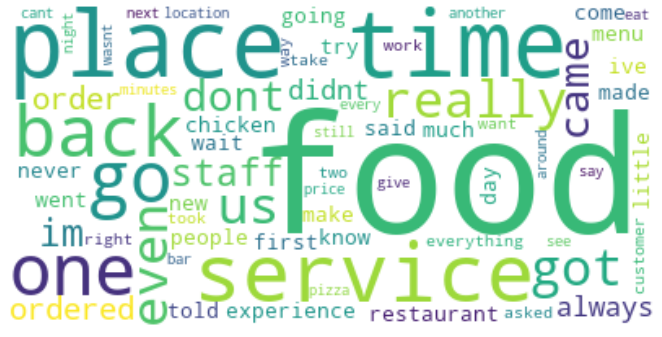

In [426]:
data1 = pd.read_csv('combined_neutral_words.csv')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


stop_words = set(stopwords.words('english')) 


top100_neutral_words = data1[~data1["Unnamed: 0"].isin(list(stop_words))].head(100)

words = top100_neutral_words["Unnamed: 0"].values 
counts = top100_neutral_words["neutral_words"].values


text = ""
for index in range(len(counts)):
    text = text +  " ".join([words[index]] * int(counts[index]/100000)) + " "
print(text) 

    
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", collocations=False).generate(text)
plt.figure(figsize=(14, 12), dpi=60)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordclouds_neutral_words.png')
plt.show()

# df[~df['A'].isin([3, 6])]

In [253]:
print(len(positive_words))

8424996


In [254]:
positive_words_df = pd.DataFrame(positive_words[0:8424995], columns=["positive_words"])
positive_words_df.shape

(8424995, 1)

In [274]:
combined_positive_words = pd.DataFrame(positive_words_df["positive_words"].value_counts())
print(combined_positive_words.shape)
combined_positive_words.head()

(2079, 1)


,positive_words
good,563355
great,556984
like,394438
well,219796
nice,218164


In [260]:
combined_positive_words.to_csv('combined_positive_words.csv')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good good great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like well well well well well well well well well well well well well well well well well well well well well nice nice nice nice nice nice nice nice nice nice nice nice nice nice nice nice nice nice 

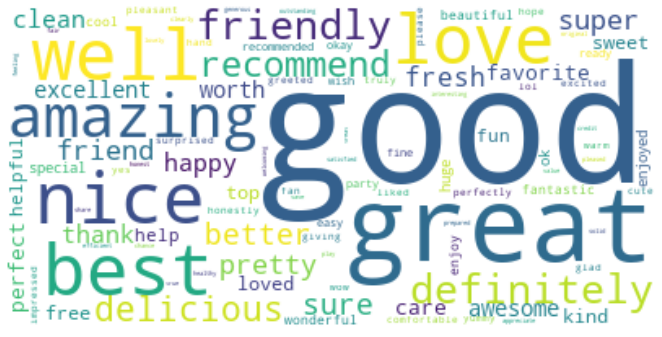

In [428]:
data2 = pd.read_csv('combined_positive_words.csv')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


stop_words = set(stopwords.words('english')) 


top100_positive_words = data2[~data2["Unnamed: 0"].isin(list(stop_words))].head(100)

words = top100_positive_words["Unnamed: 0"].values 
counts = top100_positive_words["positive_words"].values


text = ""
for index in range(len(counts)):
    text = text +  " ".join([words[index]] * int(counts[index]/10000)) + " "
print(text) 

    
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", collocations=False).generate(text)
plt.figure(figsize=(14, 12), dpi=60)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordclouds_positive_words.png')
plt.show()


In [268]:
print(len(negative_words))

2577073


In [270]:
negative_words_df = pd.DataFrame(negative_words[0:2577072], columns=["negative_words"])
negative_words_df.shape

(2577072, 1)

In [272]:
combined_negative_words = pd.DataFrame(negative_words_df["negative_words"].value_counts())
print(combined_negative_words.shape)
combined_negative_words.head()

(2700, 1)


,negative_words
no,304028
bad,96356
disappointed,59992
pay,56926
ill,55684


In [275]:
combined_negative_words.to_csv('combined_negative_words.csv')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


bad bad bad bad bad bad bad bad bad disappointed disappointed disappointed disappointed disappointed pay pay pay pay pay ill ill ill ill ill hard hard hard hard hard wrong wrong wrong wrong rude rude rude rude stop stop stop stop worst worst worst worst problem problem problem cut cut cut horrible horrible horrible terrible terrible terrible stopped stopped stopped unfortunately unfortunately poor poor charged charged dirty dirty empty seriously disappointing waste low miss lost awful sad pain lack avoid crazy worse limited missing negative complaint mistake die forget problems weird ridiculous difficult alone disappoint broken unprofessional hate mess                                                    


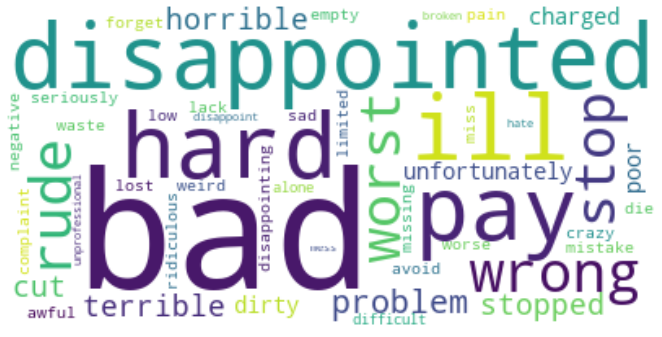

In [439]:
data3 = pd.read_csv('combined_negative_words.csv')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


stop_words = set(stopwords.words('english')) 


top100_negative_words = data3[~data3["Unnamed: 0"].isin(list(stop_words))].head(100)

words = top100_negative_words["Unnamed: 0"].values 
counts = top100_negative_words["negative_words"].values


text = ""
for index in range(len(counts)):
    text = text +  " ".join([words[index]] * int(counts[index]/10000)) + " "
print(text) 

    
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", collocations=False).generate(text)
plt.figure(figsize=(14, 12), dpi=60)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordclouds_negative_words.png')
plt.show()


In [309]:
#break down original df for each year

df_2018 = review_df.loc[review_df['date'] >= '2018-01-01']
df_2017 = review_df.loc[(review_df['date'] >= '2017-01-01') & (review_df['date'] <= '2017-12-31') ]
df_2016 = review_df.loc[(review_df['date'] >= '2016-01-01') & (review_df['date'] <= '2016-12-31') ]
df_2015 = review_df.loc[(review_df['date'] >= '2015-01-01') & (review_df['date'] <= '2015-12-31') ]
df_2014 = review_df.loc[(review_df['date'] >= '2014-01-01') & (review_df['date'] <= '2014-12-31') ]
df_2013 = review_df.loc[(review_df['date'] >= '2013-01-01') & (review_df['date'] <= '2013-12-31') ]
df_2012 = review_df.loc[(review_df['date'] >= '2012-01-01') & (review_df['date'] <= '2012-12-31') ]
df_2011 = review_df.loc[(review_df['date'] >= '2011-01-01') & (review_df['date'] <= '2011-12-31') ]
df_2010 = review_df.loc[(review_df['date'] >= '2010-01-01') & (review_df['date'] <= '2010-12-31') ]
df_2009 = review_df.loc[(review_df['date'] >= '2009-01-01') & (review_df['date'] <= '2009-12-31') ]
df_2008 = review_df.loc[(review_df['date'] >= '2008-01-01') & (review_df['date'] <= '2008-12-31') ]


In [310]:
print(df_2018.shape)
print(df_2017.shape)
print(df_2016.shape)
print(df_2015.shape)
print(df_2014.shape)
print(df_2013.shape)
print(df_2012.shape)
print(df_2011.shape)
print(df_2010.shape)
print(df_2009.shape)
print(df_2008.shape)

(1177662, 9)
(1213796, 9)
(1095372, 9)
(949296, 9)
(702403, 9)
(489545, 9)
(365872, 9)
(301897, 9)
(186562, 9)
(100745, 9)
(57111, 9)


In [325]:
review_2018_df = pd.DataFrame(df_2018['text'])
review_2017_df = pd.DataFrame(df_2017['text'])
review_2016_df = pd.DataFrame(df_2016['text'])
review_2015_df = pd.DataFrame(df_2015['text'])
review_2014_df = pd.DataFrame(df_2014['text'])
review_2013_df = pd.DataFrame(df_2013['text'])
review_2012_df = pd.DataFrame(df_2012['text'])
review_2011_df = pd.DataFrame(df_2011['text'])
review_2010_df = pd.DataFrame(df_2010['text'])
review_2009_df = pd.DataFrame(df_2009['text'])
review_2008_df = pd.DataFrame(df_2008['text'])

In [327]:
#remove non-English comments

import nltk
nltk.download('words')

non_english_words = list(nltk.corpus.words.words())

cleaned_review_2018 = review_2018_df[~review_2018_df["text"].isin(list(non_english_words))]
cleaned_review_2017 = review_2017_df[~review_2017_df["text"].isin(list(non_english_words))]
cleaned_review_2016 = review_2016_df[~review_2016_df["text"].isin(list(non_english_words))]
cleaned_review_2015 = review_2015_df[~review_2015_df["text"].isin(list(non_english_words))]
cleaned_review_2014 = review_2014_df[~review_2014_df["text"].isin(list(non_english_words))]
cleaned_review_2013 = review_2013_df[~review_2013_df["text"].isin(list(non_english_words))]
cleaned_review_2012 = review_2012_df[~review_2012_df["text"].isin(list(non_english_words))]
cleaned_review_2011 = review_2011_df[~review_2011_df["text"].isin(list(non_english_words))]
cleaned_review_2010 = review_2010_df[~review_2010_df["text"].isin(list(non_english_words))]
cleaned_review_2009 = review_2009_df[~review_2009_df["text"].isin(list(non_english_words))]
cleaned_review_2008 = review_2008_df[~review_2008_df["text"].isin(list(non_english_words))]


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\flyto\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [328]:
print(cleaned_review_2018.shape)
print(cleaned_review_2017.shape)
print(cleaned_review_2016.shape)
print(cleaned_review_2015.shape)
print(cleaned_review_2014.shape)
print(cleaned_review_2013.shape)
print(cleaned_review_2012.shape)
print(cleaned_review_2011.shape)
print(cleaned_review_2010.shape)
print(cleaned_review_2009.shape)
print(cleaned_review_2008.shape)


(1177652, 1)
(1213790, 1)
(1095356, 1)
(949272, 1)
(702387, 1)
(489524, 1)
(365852, 1)
(301887, 1)
(186560, 1)
(100735, 1)
(57109, 1)


In [329]:
!pip install TextBlob

In [333]:
#Create quick lambda functions to find the polarity and subjectivity of each routine
#test out the function for the smallest dataset which is 2008

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

cleaned_review_2008['polarity'] = cleaned_review_2008['text'].apply(pol)
cleaned_review_2008['subjectivity'] = cleaned_review_2008['text'].apply(sub)
cleaned_review_2008

C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,text,polarity,subjectivity
832100,my last visit to vegas was early this past sep...,0.035256,0.472361
792169,the atmosphere and staff are really great here...,0.300694,0.576389
5472135,been 3xs if u stay venitian resort get fre...,0.165000,0.570000
5527886,one of the original grimy and dirty psuedomex ...,0.133845,0.485936
191384,the line to get in went around the corner and ...,0.202755,0.487347
...,...,...,...
4781528,a quiet secluded restaurant off the strip you...,0.273405,0.510526
3448479,i usually come here for the salad bar but when...,0.085859,0.515074
2727808,desertdwelling parrotheads and touristtrap lov...,0.116827,0.516827
4706916,if i could marry the food at thara thai i woul...,0.238462,0.536538


In [334]:
cleaned_review_2008.to_csv('cleaned_review_2008.csv')

In [335]:
#Sentinment analysis for the rest of dataset

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

cleaned_review_2009['polarity'] = cleaned_review_2009['text'].apply(pol)
cleaned_review_2009['subjectivity'] = cleaned_review_2009['text'].apply(sub)

cleaned_review_2010['polarity'] = cleaned_review_2010['text'].apply(pol)
cleaned_review_2010['subjectivity'] = cleaned_review_2010['text'].apply(sub)

cleaned_review_2011['polarity'] = cleaned_review_2011['text'].apply(pol)
cleaned_review_2011['subjectivity'] = cleaned_review_2011['text'].apply(sub)

cleaned_review_2012['polarity'] = cleaned_review_2012['text'].apply(pol)
cleaned_review_2012['subjectivity'] = cleaned_review_2012['text'].apply(sub)

cleaned_review_2013['polarity'] = cleaned_review_2013['text'].apply(pol)
cleaned_review_2013['subjectivity'] = cleaned_review_2013['text'].apply(sub)

cleaned_review_2014['polarity'] = cleaned_review_2014['text'].apply(pol)
cleaned_review_2014['subjectivity'] = cleaned_review_2014['text'].apply(sub)

cleaned_review_2015['polarity'] = cleaned_review_2015['text'].apply(pol)
cleaned_review_2015['subjectivity'] = cleaned_review_2015['text'].apply(sub)

cleaned_review_2016['polarity'] = cleaned_review_2016['text'].apply(pol)
cleaned_review_2016['subjectivity'] = cleaned_review_2016['text'].apply(sub)

cleaned_review_2017['polarity'] = cleaned_review_2017['text'].apply(pol)
cleaned_review_2017['subjectivity'] = cleaned_review_2017['text'].apply(sub)

cleaned_review_2018['polarity'] = cleaned_review_2018['text'].apply(pol)
cleaned_review_2018['subjectivity'] = cleaned_review_2018['text'].apply(sub)

print(cleaned_review_2009.head)
print(cleaned_review_2010.head)
print(cleaned_review_2011.head)
print(cleaned_review_2012.head)
print(cleaned_review_2013.head)
print(cleaned_review_2014.head)
print(cleaned_review_2015.head)
print(cleaned_review_2016.head)
print(cleaned_review_2017.head)
print(cleaned_review_2018.head)

C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<bound method NDFrame.head of                                                       text  polarity  \
5973029  my husband  i had an amazing time the view the...  0.421000   
5965869  the food here is mediocre at best  i guess whe...  0.011047   
6526441  as i was with several other fabulous yelpers i...  0.121753   
5926926  i will preface this by saying im not a big bbq...  0.278195   
5224205  had the omakase at the instruction of my waite...  0.472857   
...                                                    ...       ...   
4844993  more like 35 stars  its better than your avera...  0.235256   
4252634  bojangles is your standard fast food fried chi... -0.020098   
1636718  200th review and on the last day of december 2...  0.116114   
6249548  never again limited beer selection bad design ... -0.041270   
2900871  the best pizza in cabarrus county granted i ha...  0.150977   

         subjectivity  
5973029      0.565304  
5965869      0.446202  
6526441      0.353403  
5926926  

[949272 rows x 3 columns]>
<bound method NDFrame.head of                                                       text  polarity  \
1296165  palm springs roll was very good the sauce was ...  0.552500   
452428   not the friendliest place but they get the job...  0.142857   
5052252  this place a hole in the wall next to a dirty ...  0.028571   
377202   i am very unimpressed with my last few visits ... -0.042857   
1193771  we havent even been called back yet  we have b... -0.575000   
...                                                    ...       ...   
4375053  my first meal at this restaurant was sitting a...  0.187778   
3889774  i ordered a medium cup of mint chocolate with ...  0.600000   
2420956  went to this show last night  it is hysterical...  0.204762   
5051340  frankly speaking we hit this restaurant by acc...  0.012500   
3052128  this is a review of their espresso bar inside ...  0.333929   

         subjectivity  
1296165      0.720000  
452428       0.267857  
505225

In [336]:
cleaned_review_2009.to_csv('cleaned_review_2009.csv')
cleaned_review_2010.to_csv('cleaned_review_2010.csv')
cleaned_review_2011.to_csv('cleaned_review_2011.csv')
cleaned_review_2012.to_csv('cleaned_review_2012.csv')
cleaned_review_2013.to_csv('cleaned_review_2013.csv')
cleaned_review_2014.to_csv('cleaned_review_2014.csv')
cleaned_review_2015.to_csv('cleaned_review_2015.csv')
cleaned_review_2016.to_csv('cleaned_review_2016.csv')
cleaned_review_2017.to_csv('cleaned_review_2017.csv')
cleaned_review_2018.to_csv('cleaned_review_2018.csv')

In [356]:
cleaned_review_2008

,text,polarity,subjectivity
832100,my last visit to vegas was early this past sep...,0.035256,0.472361
792169,the atmosphere and staff are really great here...,0.300694,0.576389
5472135,been 3xs if u stay venitian resort get fre...,0.165000,0.570000
5527886,one of the original grimy and dirty psuedomex ...,0.133845,0.485936
191384,the line to get in went around the corner and ...,0.202755,0.487347
...,...,...,...
4781528,a quiet secluded restaurant off the strip you...,0.273405,0.510526
3448479,i usually come here for the salad bar but when...,0.085859,0.515074
2727808,desertdwelling parrotheads and touristtrap lov...,0.116827,0.516827
4706916,if i could marry the food at thara thai i woul...,0.238462,0.536538


In [373]:
df_result_2008 = df_2008.merge(cleaned_review_2008,  left_on="text", right_on="text")
df_result_2008 
#cleaned_review_2008.columns

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity
0,4Z92yuKc2PUD1lgtHwFurQ,ECjj9goJ8AaDQXs1jvqNJg,xtYiHTmunjfCN2sUaQxBjA,3.0,3,2,2,my last visit to vegas was early this past sep...,2008-12-30 23:57:34,0.035256,0.472361
1,SRuXcSLGJLd9t-PiV-LTWg,Fr5rftewEA5lVV5edJjCpw,WVCSiyXjEORiWEet8asURA,4.0,1,0,0,the atmosphere and staff are really great here...,2008-12-30 23:51:11,0.300694,0.576389
2,_IWhF7toNAMF20Hu8P7Jag,oc3u68ugJlAP__025Ji2fw,ECOkEVUodMLUxvI0PMI4gQ,5.0,0,0,0,been 3xs if u stay venitian resort get fre...,2008-12-30 23:51:08,0.165000,0.570000
3,8oGwBqqnfAS53kgtgWKEGQ,Fr5rftewEA5lVV5edJjCpw,oi_jhCtPLj6NULrCe_JllA,4.0,1,0,0,one of the original grimy and dirty psuedomex ...,2008-12-30 23:44:43,0.133845,0.485936
4,nGCoZDCgM82E0mZJCQgcaw,B2x9i-9H_qWFolMiq-aFSg,ujHiaprwCQ5ewziu0Vi9rw,2.0,0,0,0,the line to get in went around the corner and ...,2008-12-30 23:42:23,0.202755,0.487347
...,...,...,...,...,...,...,...,...,...,...,...
57158,-VjmH8i7zpzfXjoCfFZaqQ,34pnOU_2J1U98ZhZKS6ykA,BG8lvZoPTrPJqcvTh-ytzg,4.0,0,0,0,a quiet secluded restaurant off the strip you...,2008-01-01 00:29:23,0.273405,0.510526
57159,O-Zbxo-vE8JUts5rGMc5sQ,QZ_Arlwoj0ghfBvg69rjOw,o13eH93qmWVNFZogkjhd9w,3.0,1,0,0,i usually come here for the salad bar but when...,2008-01-01 00:23:04,0.085859,0.515074
57160,rvMos_d0qWIQJoQqw09_6A,Yej5B4nd8PqpHMQcmCTDrg,f6mQYyU_ga0DVRuRZhkmfQ,3.0,1,2,1,desertdwelling parrotheads and touristtrap lov...,2008-01-01 00:18:49,0.116827,0.516827
57161,Y3LPSgCzgNN74DbU-SCqeg,QZ_Arlwoj0ghfBvg69rjOw,hvPPw19VdGRsOEkxgyD7tg,5.0,3,5,1,if i could marry the food at thara thai i woul...,2008-01-01 00:11:35,0.238462,0.536538


In [383]:
df_result_2008["polarity"].value_counts()

df_result_2008["stars"].value_counts()

#.sort_values(by=['polarity'], ascending=False)).value_counts()

4.0    20792
5.0    16145
3.0    11336
2.0     5356
1.0     3534
Name: stars, dtype: int64

In [5]:
import matplotlib.pyplot as plt

five_star_df = df_result_2008[df_result_2008["stars"] == 5.0]
x = list(five_star_df.polarity)
y = list(five_star_df.subjectivity)
area = list(five_star_df.useful)
plt.scatter(x,y,s=area,  c=y, cmap="RdYlGn", alpha=0.5)


plt.title('5 star Sentiment Analysis in 2008')
plt.ylabel('<---- objective ----------- opinionated ---->')
plt.xlabel('<--negative ------------- positive -->')
plt.show()

# #for index, yelp in enumerate(df_result_2008.index):
# #    print(index)
#     x = df_result_2008.polarity.loc[yelp]
#     y = df_result_2008.subjectivity.loc[yelp]
#     plt.scatter(x, y, color="blue")
#     #plt.text(x+.001, y+.001, df_result_2008["stars"][index], fontsize=10)
# plt.title('5 star Sentiment Analysis in 2008')
# plt.ylabel('<---- objective ----------- opinionated ---->')
# plt.xlabel('<--negative ------------- positive -->')
# plt.show()

NameError: name 'df_result_2008' is not defined

In [391]:
df_result_2018 = df_2018.merge(cleaned_review_2018,  left_on="text", right_on="text")
df_result_2018

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity,subjectivity
0,e2AOJ3MSAYUCy4zx0NXxUA,fu-jsnkPbj4zhI2lz0ewkQ,wItXs66eEADndAGl-u_lpw,5.0,0,0,0,on first consultation already jonathan was rev...,2018-11-14 18:13:26,0.443333,0.448056
1,XLOm-4l1aMwheuxs-V4wKw,UTNefnQ3eZEbIxVu7ALO7Q,S0DRkPCiMRmMtIPVM54FRw,5.0,0,0,0,i am absolutely obsessed my friend told me to ...,2018-11-14 18:13:16,0.223611,0.751852
2,I59JegTz5rQ80emJP83ckQ,222_8pOPN2Ogy-gLNjudHw,0d0i0FaJq1GIeW1rS2D-5w,3.0,0,0,0,my expectations were extremely high and unfort...,2018-11-14 18:12:40,-0.019167,0.567083
3,UEg_PspRx9mESti4F2B5IQ,A9Z4tpG4xt06lCxFUU5khw,1e7GXqhVDs0UXUofjTkVgQ,5.0,0,0,0,i called to get a faucet replaced chris was ve...,2018-11-14 18:12:18,0.279583,0.490833
4,RwbYq93Sz-TjJws-SxRbQQ,a6NY1dBAYXZMBDxtWU6Zjw,ovQDI5j3aRIw_y73IdnqVg,5.0,0,0,0,charlie just completed reroofing my home and i...,2018-11-14 18:12:08,0.273397,0.569231
...,...,...,...,...,...,...,...,...,...,...,...
1185163,JQLbQE-ls_hdZGa7wVXQhA,kxYEgXy_ev2kkn7cYddzLw,kBopDV0xbrWyhbJBmAr_4A,2.0,1,1,0,i went to this place seeing the positive revie...,2018-01-01 00:01:23,0.133892,0.668474
1185164,Wdot4zpuPtxYtAzD6ElzkQ,Lnvh5QonYyH-zTyCwAovJg,ptWNY_h088kmKhsL-gaOEg,2.0,0,0,0,ive been here several times and ive noticed a ...,2018-01-01 00:00:46,0.003889,0.477944
1185165,md700NjAWXsrCjqwFwLmhw,Z3S7Y6ywAOrWUS-jevfu6Q,zr42_UsWfaIF-rcp37OpwA,5.0,0,0,0,i was so excited when i found out a kitchen t...,2018-01-01 00:00:25,0.299282,0.553602
1185166,ltlc6JBWIEkkQWhup8aUwg,9ibZwh0xl9ivH5MeOcNfqg,K0VNhFhaOrO3CypCqofjwA,1.0,0,2,0,not a fan of the new menu chicken is beat down...,2018-01-01 00:00:04,-0.051207,0.594641


In [440]:
df_result_2018.to_csv('2018_review_final_df.csv')

In [3]:
df_result_2018 = pd.read_csv('./yelp_reviews_dashboard/db/2018_review_final_df.csv')

In [394]:
df_result_2018["polarity"].value_counts()

df_result_2018["stars"].value_counts()


5.0    603875
1.0    207294
4.0    191952
3.0    100364
2.0     81683
Name: stars, dtype: int64

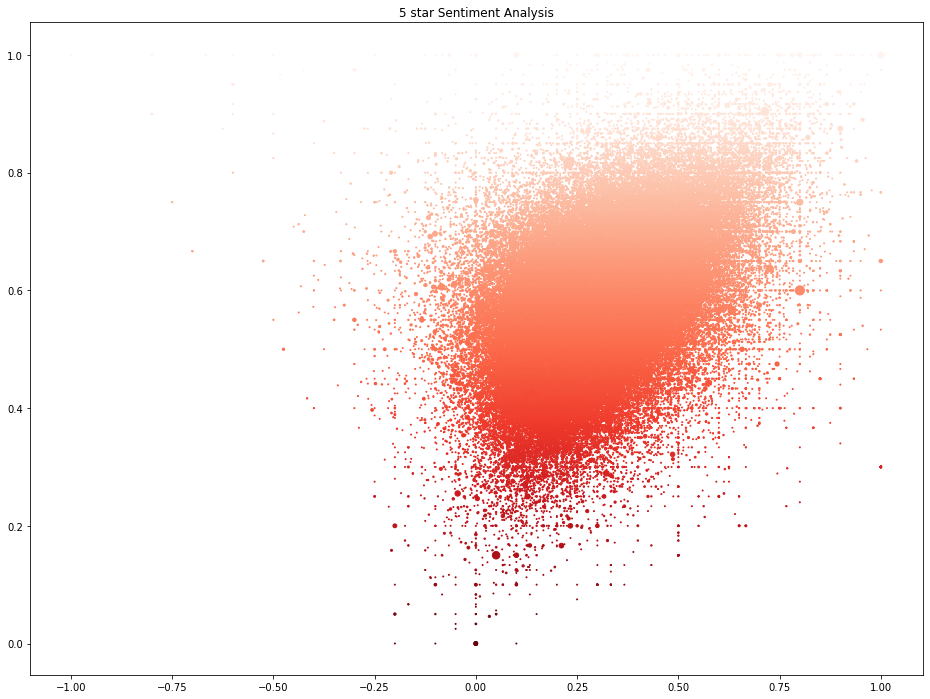

In [20]:
import matplotlib.pyplot as plt

five_star_df_2018 = df_result_2018[df_result_2018["stars"] == 5.0]
x = list(five_star_df_2018.polarity)
y = list(five_star_df_2018.subjectivity)
area = list(five_star_df_2018.useful)
plt.rcParams['figure.figsize'] = (16, 12)
plt.scatter(x,y,s=area,  c=y, cmap="Reds_r", alpha=1)


plt.title('5 star Sentiment Analysis')
# plt.ylabel('<---- objective ----------- opinionated ---->')
# plt.xlabel('<--negative ------------- positive -->')
#plt.figure(figsize=(30, 26))
#plt.savefig('5_Star_Sentiment_Analysis.png')
plt.show()


In [441]:
five_star_df_2018.to_csv('five_star_df_2018.csv')

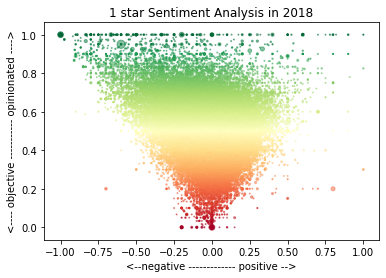

In [415]:
one_star_df_2018 = df_result_2018[df_result_2018["stars"] == 1.0]
x = list(one_star_df_2018.polarity)
y = list(one_star_df_2018.subjectivity)
area = list(one_star_df_2018.useful)
plt.scatter(x,y,s=area,  c=y, cmap="RdYlGn", alpha=0.5)


plt.title('1 star Sentiment Analysis in 2018')
plt.ylabel('<---- objective ----------- opinionated ---->')
plt.xlabel('<--negative ------------- positive -->')
plt.show()

In [442]:
one_star_df_2018.to_csv('one_star_df_2018.csv')

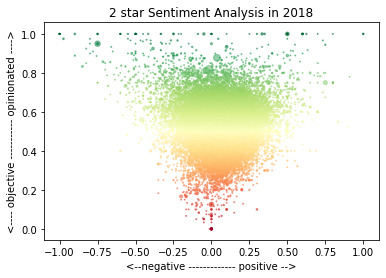

In [416]:
two_star_df_2018 = df_result_2018[df_result_2018["stars"] == 2.0]
x = list(two_star_df_2018.polarity)
y = list(two_star_df_2018.subjectivity)
area = list(two_star_df_2018.useful)
plt.scatter(x,y,s=area,  c=y, cmap="RdYlGn", alpha=0.5)


plt.title('2 star Sentiment Analysis in 2018')
plt.ylabel('<---- objective ----------- opinionated ---->')
plt.xlabel('<--negative ------------- positive -->')
plt.show()

In [443]:
two_star_df_2018.to_csv('two_star_df_2018.csv')

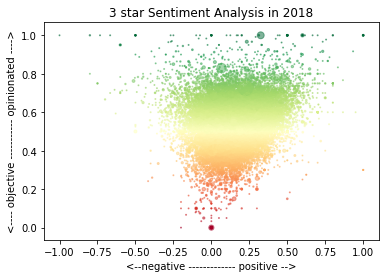

In [410]:
three_star_df_2018 = df_result_2018[df_result_2018["stars"] == 3.0]
x = list(three_star_df_2018.polarity)
y = list(three_star_df_2018.subjectivity)
area = list(three_star_df_2018.useful)
plt.scatter(x,y,s=area,  c=y, cmap="RdYlGn", alpha=0.5)


plt.title('3 star Sentiment Analysis in 2018')
plt.ylabel('<---- objective ----------- opinionated ---->')
plt.xlabel('<--negative ------------- positive -->')
plt.show()

In [444]:
three_star_df_2018.to_csv('three_star_df_2018.csv')

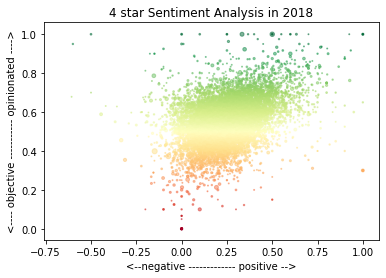

In [401]:
four_star_df_2018 = df_result_2018[df_result_2018["stars"] == 4.0]
x = list(four_star_df_2018.polarity)
y = list(four_star_df_2018.subjectivity)
area = list(four_star_df_2018.useful)
plt.scatter(x,y,s=area,  c=y, cmap="RdYlGn", alpha=0.5)


plt.title('4 star Sentiment Analysis in 2018')
plt.ylabel('<---- objective ----------- opinionated ---->')
plt.xlabel('<--negative ------------- positive -->')
plt.show()

In [445]:
four_star_df_2018.to_csv('four_star_df_2018.csv')

In [1]:
all_star_df_2018 = df_result_2018
x = list(all_star_df_2018.polarity)
y = list(all_star_df_2018.subjectivity)
area = list(all_star_df_2018.useful)
plt.rcParams['figure.figsize'] = (16, 12)
plt.scatter(x,y,s=area,  c=y, cmap="RdYlGn", alpha=0.5)


plt.title('All star Sentiment Analysis in 2018')
plt.ylabel('<---- objective ----------- opinionated ---->')
plt.xlabel('<--negative ------------- positive -->')
plt.savefig('All_Star_Sentiment_Analysis.png')
plt.show()

NameError: name 'df_result_2018' is not defined

In [446]:
all_star_df_2018.to_csv('all_star_df_2018.csv')

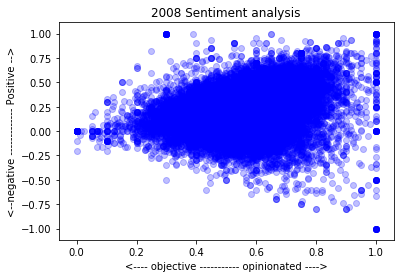

In [344]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_axis = list(cleaned_review_2008['subjectivity'])

y_axis = list(cleaned_review_2008['polarity'])

# Plot
plt.scatter(x_axis, y_axis, color='blue', alpha=0.25)
plt.title('2008 Sentiment analysis')
plt.xlabel('<---- objective ----------- opinionated ---->')
plt.ylabel('<--negative ------------- Positive -->')
plt.show()

In [ ]:
#remove stopwords from the neutral words dataframe
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
  
stop_words = set(stopwords.words('english')) 
  
filtered_neu_words = [w for w in neutral_words if not w in stop_words] 
  
filtered_pos_words = [] 
  
for w in positive_words: 
    if w not in stop_words: 
        filtered_pos_words.append(w) 
 
#print(filtered_pos_words)
filtered_pos_words_df = pd.DataFrame(filtered_pos_words)
filtered_pos_words_df

In [87]:
neutral_words_df = pd.DataFrame(neutral_words_list)
neutral_words_df.to_csv('neutral_words.csv', index=False)

In [100]:
neutral_words_df.shape

(1000001, 1)

In [76]:
positive_words_df = pd.DataFrame(positive_words)
positive_words_df.to_csv('positive_words.csv', index=False)

In [101]:
positive_words_df.shape

(8424996, 1)

In [80]:
negative_words_df = pd.DataFrame(negative_words)
negative_words_df.to_csv('negative_words.csv', index=False)

In [102]:
negative_words_df.shape

(2577073, 1)

In [89]:
!pip install wordcloud

In [98]:
positive_words_df.rename(columns={0: 'pos_words'}, inplace=True)
reduced_pos_words_df = positive

,pos_words
0,giving
1,better
2,good
3,thanks
4,great
...,...
8424991,well
8424992,clean
8424993,interesting
8424994,definitely


In [99]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

# Build worldcloud for positive words
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in positive_words_df.pos_words: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

KeyboardInterrupt: 

In [ ]:
#2nd datatset for business id

#read the business file

file = ('./yelp-dataset/yelp_academic_dataset_business.json')

business = pd.read_json(file, lines=True, encoding='utf-8')

business_df = pd.DataFrame(business)

In [ ]:
print(business_df.shape)
print(business_df.dtypes)
business_df.head()